# Diferenciación automática

## Motivación: el método de Newton

Un problema usual en la física y en las matemáticas aplicadas
es encontrar los ceros de una función. Una situación
concreta donde esto ocurre es cuando buscamos los máximos o mínimos de una
función `f(x)`, en cuyo caso buscamos los ceros de $f'(x)$.
Aplicaciones de esto se encuentran en redes neuronales, en
las que uno *entrena* la red buscando el mínimo de una función de costo.
Otra situación de interés está relacionada con seguir los puntos de equilibrio,
soluciones estacionarias u órbitas periódicas, al variar un parámetro.

Un método común para obtener los ceros de una función es el
[método de Newton](https://en.wikipedia.org/wiki/Newton%27s_method),
que requiere evaluar sucesivamente tanto la función $f(x)$ como su derivada
$f^\prime(x)$. Si bien uno puede en general escribir la función $f^\prime(x)$ en el
programa, esto puede ser complicado, por ejemplo si se cambia la función $f(x)$,
y da la posibilidad de cometer errores; esta situación se encuentra
a menudo en redes neuronales, donde uno quiere introducir o cambiar
ciertas funciones durante el entrenamiento de la red. Es por esto que
uno quisiera tener formas de evaluar la derivada directamente
a partir de la propia función $f(x)$.

En este apartado estudiaremos algunos algoritmos para obtener *aproximaciones*
de las derivadas de una función $f(x)$ numéricamente.

## Derivadas numéricas

### Derivada *derecha*

Como bien sabemos del curso de cálculo, la derivada se define como:

$$
f^\prime(x_0) = \frac{{\rm d}f}{{\rm d}x}(x_0) \equiv \lim_{h\to 0}
\frac{f(x_0+h)-f(x_0)}{h}.
$$

Numéricamente, es difícil implementar el concepto de *límite*, por
la manera en que la computadora *simula* a los números reales.
Olvidándo esto por el momento,
el lado derecho de la definición es relativamente sencillo de implementar
numéricamente. Esencialmente requerimos evaluar $f(x)$ en $x_0$ y en $x_0+h$,
donde $h$ es un número (de punto flotante) pequeño. La sutileza está entonces
en cómo implementar el límite $h\to 0$. Esto, por su parte, lo haremos de manera
ingenua (numéricamente) considerando valores de $h$ cada vez más pequeños,
por lo que esperamos obtener valores cada vez más precisos de la derivada.

Para ilustrar lo anterior, empezaremos definiendo la función `derivada_derecha`,
que aproximará *numéricamente* la derivada de la función $f(x)$, de una variable
(a priori arbitaria), en un punto $x_0$. Para esto, utilizaremos la aproximación de
la derivada que se basa en la definición, y eventualmente simularemos el *límite*
$h\to 0$.
Esta función entonces dependerá de `f`, la función que queremos derivar, `x0` el punto
donde queremos derivar a la función, y `h`, que es el incremento *finito*
respecto a $x_0$ que aparece en la definición arriba. Es decir,
calcularemos la derivada usando la aproximación
$$
f'(x_0) \approx \frac{\Delta f_+}{\Delta x} \equiv \frac{f(x_0+h)-f(x_0)}{h},
$$
Este método se conoce por el nombre de *diferencias finitas*.

In [1]:
"""
    derivada_derecha(f, x0, h)

Evalúa la derivada de ```f``` en ```x0``` usando diferencias finitas con el
incremento por la derecha.
"""
derivada_derecha(f, x0, h) = (f(x0 + h) - f(x0)) / h

Main.var"##234".derivada_derecha

A fin de *simular* el $\lim_{h\to 0}$, consideraremos distintos valores de $h$
cada vez más próximos a cero. Para cada valor de $h$ calcularemos el error
absoluto del cálculo numérico, es decir, la diferencia del valor calculado
respecto al valor *exacto* de la derivada, usando $f(x) = 3x^3-2$ en $x_0=1$.

In [2]:
f(x) = 3x^3-2

#Valor exacto de la derivada
f′(x) = 9x^2

f′ (generic function with 1 method)

In [3]:
errorabs_dd(f, f′, x0, h) = abs(f′(x0) - derivada_derecha(f, x0, h))

errorabs_dd (generic function with 1 method)

In [4]:
f′(1.0)

9.0

In [5]:
derivada_derecha(f, 1.0, 0.1)

9.930000000000012

In [6]:
#Error absoluto de la derivada derecha
errorabs_dd(f, f′, 1.0, 0.1)

0.9300000000000122

In [7]:
#Errores de la derivada derecha al similar el límite h->0
errs_dd = [ errorabs_dd(f, f′, 1.0, 1/10^i) for i=1:15 ]

15-element Vector{Float64}:
 0.9300000000000122
 0.0902999999999956
 0.00900299999829457
 0.0009000299939856404
 9.000033286099551e-5
 8.999393571684777e-6
 9.045354545378359e-7
 3.4120603231713176e-8
 7.446633389918134e-7
 7.446633389918134e-7
 7.446633389918134e-7
 0.0008001052410691045
 0.007193500536232023
 0.029397961028735153
 0.7699626167013776

In [8]:
findmin(errs_dd)

(3.4120603231713176e-8, 8)

In [9]:
derivada_derecha(f, 1.0, 1.0e-8)

9.000000034120603

El resultado anterior muestra que el mínimo del error absoluto lo encontramos
usando `h=1.0e-8` (con el muestreo que usamos), y el error absoluto es del orden de
`3.4e-8`. Esto indica que, en algún sentido, la noción de límite no la logramos
*simular* correctamente.

### Derivada *simétrica*

Una definición alternativa a la dada anteriormente para la derivada, consiste
en *simetrizar* la ocurrencia de $h$ en la definición. Podemos entonces definir
a la derivada usando la definición
$$
f^\prime(x_0) \equiv \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
$$
Repetiremos el ejercicio anterior, usando ahora la aproximación de la derivada simétrica
$$
f'(x_0) \approx \frac{\Delta f_\textrm{sym}}{\Delta x} \equiv \frac{f(x_0+h)-f(x_0-h)}{2h}.
$$

In [10]:
"""
    derivada_simétrica(f, x0,h)

Evalúa la derivada de ```f``` en ```x0``` usando diferencias finitas con el
incremento simétrico.
"""
derivada_simétrica(f, x0, h) = (f(x0 + h) - f(x0 - h)) / (2h)

Main.var"##234".derivada_simétrica

In [11]:
#Error absoluto de la derivada simétrica
errorabs_ds(f, f′, x0, h) = abs(f′(x0) - derivada_simétrica(f, x0, h))

errorabs_ds (generic function with 1 method)

In [12]:
#Errores de la derivada simétrica simulando h->0
errs_ds = [errorabs_ds(f, f′, 1.0, 1/10^i) for i=1:15]

15-element Vector{Float64}:
 0.03000000000000469
 0.0003000000000046299
 2.9999992570139966e-6
 2.9995014472206094e-8
 3.0320990163090755e-10
 7.426592674164567e-11
 8.139124929584796e-10
 1.0288317753293086e-8
 3.0057412914175075e-7
 7.446633389918134e-7
 7.446633389918134e-7
 0.0003560160312190419
 0.0027526084377313964
 0.029397961028735153
 0.32587340685131494

In [13]:
findmin(errs_ds)

(7.426592674164567e-11, 6)

In [14]:
derivada_simétrica(f, 1.0, 1.0e-6)

8.999999999925734

Al igual que en el caso de la derivada derecha, la derivada simétrica no simula
correctamente el límite, como podríamos haberlo inicialmente pensado, sin embargo,
la aproximación es mejor, en el sentido de que el error absoluto es menor
(en 3 órdenes de magnitud) que el de la derivada derecha.

Los resultados anteriores sobre la convergencia se pueden entender analíticamente
de la siguiente manera: si usamos el desarrollo en series de Taylor de
$f(x_0+h)$ y $f(x_0-h)$ tenemos:

$$
\begin{align*}
f(x_0+h) & = f(x_0) + h f^\prime(x_0) + \frac{h^2}{2}f^{\prime\prime}(x_0) + \mathcal{O}(h^3),\\
f(x_0-h) & = f(x_0) - h f^\prime(x_0) + \frac{h^2}{2}f^{\prime\prime}(x_0) + \mathcal{O}(h^3),\\
\end{align*}
$$
de donde obtenemos, para cada aproximación de la derivada,
$$
\begin{align*}
\frac{\Delta f_+}{\Delta x} & = f^\prime(x_0) + \mathcal{O}(h),\\
\frac{\Delta f_\textrm{sym}}{\Delta x} & = f^\prime(x_0) + \mathcal{O}(h^2).\\
\end{align*}
$$

Los resultados anteriores muestran que la aproximación de la derivada derecha
tiene un error de orden $h$ para la derivada, mientras que la aproximación
de la derivada simétrica tiene un error que es proporcional a $h^2$. Esto
explica que, en general, la aproximación de la derivada simétrica será mejor.

El hecho de que el *límite* no pueda ser simulado como uno quisiera no está relacionado
con las propiedades de convergencia (en términos de $h$), sino está relacionado con que
el cálculo involucra números de punto flotante (y no números en $\mathbb{R}$) y que las
diferencias de números muy cercanos (como las que definen el numerador), o
las divisiones con números muy pequeños, conllevan la pérdida de precisión.
Esto se conoce como
[cancelación catastrófica](https://en.wikipedia.org/wiki/Catastrophic_cancellation).

### Resumen

Resumiendo:

- El error absoluto de la "derivada derecha" es lineal respecto a $h$. Sin embargo,
al implementarlo en la computadora,
para valores suficientemente pequeños de $h$, el valor obtenido de la derivada
deja de tener sentido ya que se pierde la exactitud.

- El error absoluto de la "derivada simétrica" es cuadrático respecto a $h$. Al igual
que la derivada derecha, para $h$ suficientemente pequeña, la implementación es dominada por
[*errores de cancelación*](https://en.wikipedia.org/wiki/Loss_of_significance)
debidos a las diferencias que hay en el numerador y a la división de números muy pequeños.

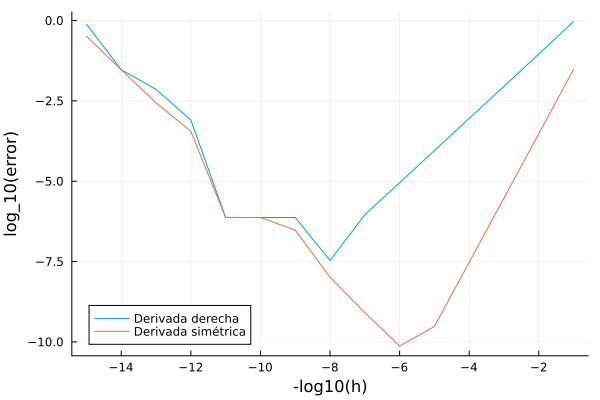

In [15]:
using Plots

plot(-(1:15), log10.(errs_dd), xlabel="-log10(h)", ylabel="log_10(error)", label="Derivada derecha", legend=:bottomleft)
plot!(-(1:15), log10.(errs_ds), xlabel="-log10(h)", ylabel="log_10(error)", label="Derivada simétrica")

Los puntos anteriores muestran que al implementar un algoritmo
numéricamente (usando números de punto flotante u otros con
*precisión finita*) es importante la manera en que se hace,
y cuestiones de convergencia y manejo de errores
numéricos se vuelven importantes.

## Diferenciación automática

La pregunta es si podemos obtener el valor exacto,
en un sentido numérico, usando números de punto flotante,
y en la medida de lo posible hacer esto de forma independiente de $h$.
Esto es, obtener como resultado el valor que más se acerca al valor
que se obtendría usando números reales, excepto quizás por cuestiones
inevitables de redondeo. Las técnicas que introduciremos se conocen como
*diferenciación automática* o *algorítmica*.

### Preludio: álgebra de los números complejos

Antes de ilustrar cómo funcionan los *números duales*, que introduciremos
más adelante, empezaremos recordando el álgebra de los números complejos:
$z = a + \mathrm{i} b$, donde $a$
representa la parte real de $z$, $b$ es su parte imaginaria, y donde
$\mathrm{i}^2=-1$.

Uno puede definir todas las operaciones aritméticas de *manera
natural* (a partir de los números reales), manteniendo las expresiones
con $\mathrm{i}$ factorizada. En el caso de la multiplicación (y la
división) debemos explotar el hecho que $\mathrm{i}^2=-1$, que es
la propiedad que *define* al número imaginario $\mathrm{i}$;
este punto será clave más adelante con extendamos este
tipo de análisis a los números duales.

De esta manera, para $z = a + \mathrm{i} b$ y $w = c + \mathrm{i} d$,
tenemos que,
$$
\begin{align*}
z \pm w & = (a + \mathrm{i} b) \pm (c + \mathrm{i} d) = (a \pm c) + \mathrm{i}(b \pm d),\\
z \cdot w & = (a + \mathrm{i} b)\cdot (c + \mathrm{i} d)
  = ac + \mathrm{i} (ad+bc) + \mathrm{i}^2 b d\\
 & = (ac - b d) + \mathrm{i} (ad+bc).\\
\end{align*}
$$

Por último, vale la pena recordar que $\mathbb{C}$ es
*isomorfo* a $\mathbb{R}^2$, esto es, uno puede asociar un punto
en $\mathbb{C}$ con uno en $\mathbb{R}^2$ de manera unívoca, y
visceversa.

### Números duales

De manera análoga a los números complejos, introduciremos un par
ordenado que definirá a los *números duales*, donde la primer componente
es el valor de una función $f(x)$ evaluada en un punto $x_0$ dado, y
la segunda es el valor de su derivada evaluada en el mismo punto.
Esto es, definimos a los *duales* como:

$$
\mathbb{D}_{x_0}f = \big( f(x_0), f'(x_0) \big) = \big( f_0, f'_0 \big) =
f_0 + \epsilon\, f'_0.
$$

Aquí $f_0 = f(x_0)$ y $f'_0=\frac{d f}{d x}(x_0)$ y, en la última
igualdad, $\epsilon$ sirve para indicar la segunda componente del
par ordenado. En un sentido que se precisará más adelante, $\epsilon$
se comporta de manera parecida a $\mathrm{i}$ para los números
complejos: mientras $\mathrm{i}$ distingue la parte real y la parte
imaginaria de un número complejo, $\epsilon$ distinguirá la parte
función de la parte derivada en los números duales.

En particular, para la función constante $f(x)=c$, cuya valor
es independiente de la variable (independiente) $x$, se debe cumplir
que el dual asociado sea
$$
\mathbb{D}_{x_0}c = (c, 0) = c,
$$
y para la función
identidad $f(x)=x$ tendremos
$$
\mathbb{D}_{x_0} x =(x_0,1) = x_0 + \epsilon.
$$
Vale la pena notar que la variable independiente respecto a la que estamos
derivando es la que define a la función identidad, y que su derivada es 1.

### Aritmética de duales

Para $\mathbb{D}_{x_0} u = (u_0, u^\prime_0)$ y
$\mathbb{D}_{x_0} w = (w_0, w^\prime_0)$, y *definiendo* $\epsilon^2=0$,
usando simple álgebra, tenemos que las operaciones aritméticas para los
números duales vienen dadas por:

$$
\begin{align*}
   \pm \mathbb{D}_{x_0} u & = \big(\pm u_0, \pm u'_0 \big), \\
\mathbb{D}_{x_0} (u\pm w) & = \mathbb{D}_{x_0} u \pm \mathbb{D}_{x_0} w =
    \big( u_0 \pm w_0, \, u'_0\pm w'_0 \big),\\
\mathbb{D}_{x_0} (u \cdot w) & = \mathbb{D}_{x_0} u \cdot \mathbb{D}_{x_0} w =
    \big( u_0 w_0,\, u_0 w'_0 +  w_0 u'_0 \big),\\
\mathbb{D}_{x_0} \frac{u}{w} & = \frac{\mathbb{D}_{x_0} u}{\mathbb{D}_{x_0} w} =
    \big( \frac{u_0}{w_0},\, \frac{ u'_0 - (u_0/w_0)w'_0}{w_0}\big),\\
{\mathbb{D}_{x_0} u}^n & = \mathbb{D}_{x_0}u \cdot {\mathbb{D}_{x_0} u}^n = \big( u_0^n,\, n u_0^{n-1} u'_0 \big).\\
\end{align*}
$$

Claramente, en las expresiones anteriores la segunda componente corresponde
a la derivada de la operación aritmética involucrada.
Finalmente, vale la pena también notar que, en las operaciones
aritméticas *ambos* los duales están definidos en el mismo punto $x_0$.

#### Un ejemplo de cálculo con duales

A fin de desarrollar un ejemplo que utiliza las operaciones que hemos
definido entre duales, evaluaremos la función
$f(x) = (3x^2-8x+5)/(7x^3-1)$ y su derivada en $x=2$. Para esto usaremos
el dual $u = 2 + \epsilon$; vale la pena enfatizar
que este dual corresponde a la variable *independiente* $x$ evaluada en 2,
es decir, la función identidad evaluada en 2, $u = {\mathbb{D}_{2} x}$,
que corresponde en efecto a la variable independiente
ya que su derivada (en cualquier punto) es 1.

(Si todo lo que hemos hecho es consistente, la primer componente
del resultado deberá corresponder a evaluar
[$f(2)=1/55$](https://www.wolframalpha.com/input?i=evaluate+%283x%5E2-8x%2B5%29%2F%287x%5E3-1%29+at+x+%3D+2),
y la segunda componente corresponderá a la derivada
[$f^\prime(2)=136/3025$](https://www.wolframalpha.com/input?i=derivative%28%283x%5E2-8x%2B5%29%2F%287x%5E3-1%29%2C+x%2C+2%29).)

$$
\begin{align*}
f(2+\epsilon) = & \frac{3u^2-8u+5}{7u^3-1} =
            \frac{3(2+\epsilon)^2-8(2+\epsilon)+5}{7(2+\epsilon)^3-1} \\
        = & \frac{3*2^2-8*2^1+5 +\epsilon(2*3*2^1-8) + 3\epsilon^2}{7*2^3-1 + \epsilon(3*7*2^2) + 7*2*3\epsilon^2 + 7\epsilon^3} \\
        = & \frac{1+4\epsilon}{55+84\epsilon} =
            \frac{1}{55} + \epsilon \frac{4-\frac{1}{55}(84)}{55}
            = \frac{1}{55} + \epsilon \frac{4*55-84}{3025}
            = \frac{1}{55} + \epsilon \frac{136}{3025}.\\
\end{align*}
$$

Los resultados claramente corresponden con la interpretación que queremos.
Es importante recalcar que si el dual es de la forma
$u = {\mathbb{D}_{x_0} x}$, es decir, corresponde a la
variable independiente evaluada en $x_0$, la segunda componente
de $f(u)$ corresponde a la derivada $f^\prime(x_0)$.

### Funciones definidas sobre los duales

La regla de la cadena es fundamental para el cálculo de las derivadas,
y por lo mismo, se aplicará para definir funciones sobre duales.
Definiremos la aplicación de funciones en duales, buscando que la
interpretación del dual sea preservada: la primer componente del par
ordenado debe corresponder a la composición de las funciones, y la
segunda a su derivada.

Entonces, dado que
$$
\frac{\textrm{d}\exp(f(x))}{\textrm{d}x}(x_0) = \exp(f(x_0)) f^\prime(x_0),
$$
para ${\mathbb{D}_{x_0} u}=u_0+\epsilon u_0^\prime$ podemos escribir
$$
\exp({\mathbb{D}_{x_0} u}) = \exp(u) = \exp(u_0+\epsilon u_0^\prime)
    = \exp(u_0)+ \epsilon \exp(u_0) u_0^\prime.
$$

De manera similar podemos obtener
$$
\begin{align*}
\exp({\mathbb{D}_{x_0} u}) & = \exp(u_0) + \epsilon \exp(u_0) u_0^\prime,\\
\log({\mathbb{D}_{x_0} u}) & = \log(u_0) + \epsilon \frac{u_0^\prime}{u_0},\\
\sin({\mathbb{D}_{x_0} u}) & = \sin(u_0) + \epsilon \cos(u_0) u_0^\prime,\\
\cos({\mathbb{D}_{x_0} u}) & = \cos(u_0) - \epsilon \sin(u_0) u_0^\prime,\\
\tan({\mathbb{D}_{x_0} u}) & = \tan(u_0) + \epsilon \sec^2(u_0) u_0^\prime,\\
\sinh({\mathbb{D}_{x_0} u}) & = \sinh(u_0) + \epsilon \cosh(u_0) u_0^\prime,\\
\dots
\end{align*}
$$

Al igual que antes, lo importante de estas expresiones es que si
$u = {\mathbb{D}_{x_0} x}$ es la variable independiente evaluada
en $x_0$ (la derivada de $u$ es 1), entonces
la segunda componente de $f(u)$ corresponderá a $f^\prime(x_0)$.
Las reglas anteriores garantizan que la composición de funciones se
puede usar con duales.

### Epílogo

Citando a [wikipedia](https://en.wikipedia.org/wiki/Automatic_differentiation):

> Automatic differentiation (AD), also called algorithmic differentiation or computational differentiation [...], is a set of techniques to numerically evaluate the derivative of a function specified by a computer program.

Diferenciación automática **no es** diferenciación numérica. Está
basada en cálculos numéricos (evaluación de funciones en la computadora
con números de precisión finita), pero **no** usa ninguna de las
definiciones basadas en diferencias finitas. Tampoco es diferenciación
simbólica. La implementación que hemos descrito se basa en definir
los números duales, que son estructuras adecuadas que permiten obtener
los resultados que buscamos.

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*